In [118]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [119]:
df=pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


there are 614 rows and 13 columns

loan_status is our target variable

there are object, int and float datatypes present

will be encoding the object columns




# EDA

In [120]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

there are 8 object dataypes column, 1 integer datatype and rest is float datatype

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there are several null values present in several columns we need to impute these values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


we can see the complete information of the non null count, datatype

In [6]:
a=df.describe(include=['O']).columns

keeping the object datatype columns in a variable

In [7]:
for i in a:
    print(i)
    print(df[i].value_counts())
    print('\n')

Loan_ID
LP002931    1
LP002916    1
LP001529    1
LP001726    1
LP001637    1
           ..
LP002116    1
LP001940    1
LP002255    1
LP001038    1
LP001073    1
Name: Loan_ID, Length: 614, dtype: int64


Gender
Male      489
Female    112
Name: Gender, dtype: int64


Married
Yes    398
No     213
Name: Married, dtype: int64


Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64




individual counts of each variable in every object datatype column

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


applicant income, aoapplicantincome and loan amout mean is higher than median, skewness might be present.

there is a huge differenece between 75% and max value in applicant income, coapplicantincome and loan amount columns, outlers must be present

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

these are the columns

now we will be imputing all the missing values with their mode or mean or median (as per the requirement)

object datatype column we will imputing the null values with mode

In [10]:
df['Gender'].mode()

0    Male
dtype: object

In [11]:
df['Gender'].fillna('Male',inplace=True)

removed null values with mode

In [12]:
df['Married'].mode()

0    Yes
dtype: object

In [13]:
df['Married'].fillna('Yes',inplace=True)

removed null values with mode

In [14]:
df['Dependents'].mode()

0    0
dtype: object

In [15]:
df['Dependents'].fillna('0',inplace=True)

removed null values with mode

In [16]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [17]:
df['Dependents']=df['Dependents'].replace('3+','3')

In [18]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

replaced 3+ with 3 for ml purpose and will change the datatype to int

In [19]:
df['Dependents']=df['Dependents'].astype('int')

In [20]:
df['Dependents'].unique()

array([0, 1, 2, 3])

In [21]:
df['Self_Employed'].mode()

0    No
dtype: object

In [22]:
df['Self_Employed'].fillna('No',inplace=True)

replaced null values with mode

In [23]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [24]:
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [25]:
df['Loan_Amount_Term'].fillna(360.0,inplace=True)

its an ordinal column hence we will impute with mode

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

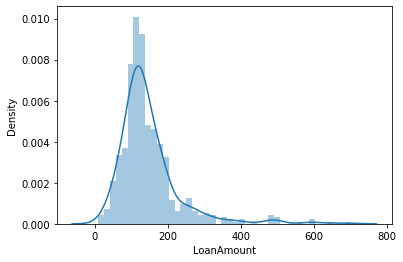

In [26]:
sn.distplot(df['LoanAmount'])

data is right skewed

In [27]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

removed null values with the median

In [28]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [29]:
df['Credit_History'].fillna(1.0,inplace=True)

its an ordinal column hence imputing null values with mode

In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

null values has been removed

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

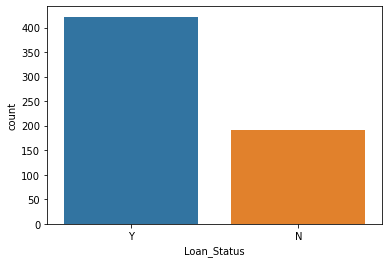

In [31]:
sn.countplot(df['Loan_Status'])

this our target variable, it looks imbalanced.

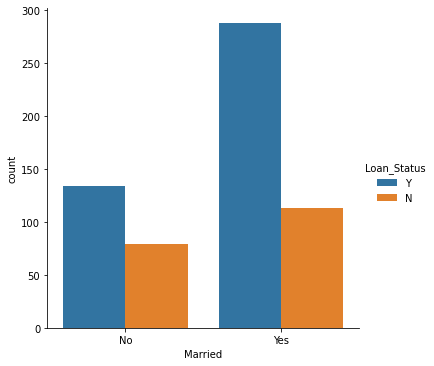

In [32]:
sn.catplot(x='Married',hue='Loan_Status',kind='count',data=df)

chances of loan approval are more if you are married

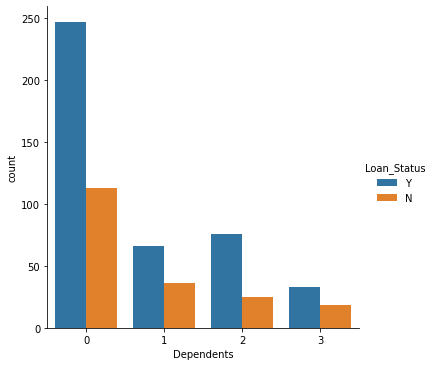

In [33]:
sn.catplot(x='Dependents',hue='Loan_Status',kind='count',data=df)

if you have 0 dependents then the loan approval chances are more

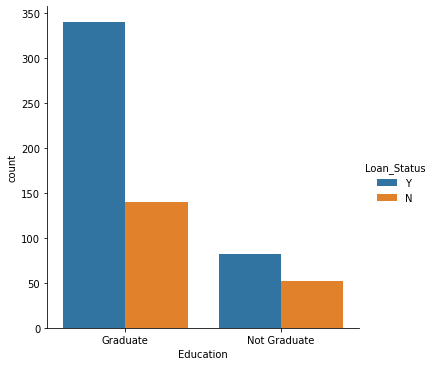

In [34]:
sn.catplot(x='Education',hue='Loan_Status',kind='count',data=df)

graduate people have more approved loan status

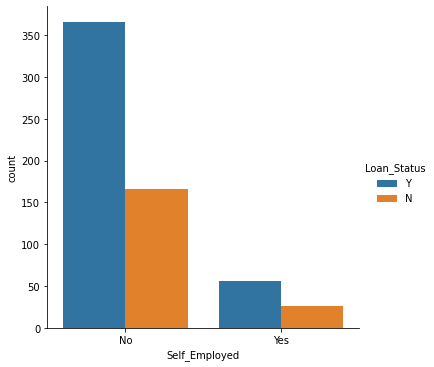

In [35]:
sn.catplot(x='Self_Employed',hue='Loan_Status',kind='count',data=df)

people who are not self employed have high rate of loan approval

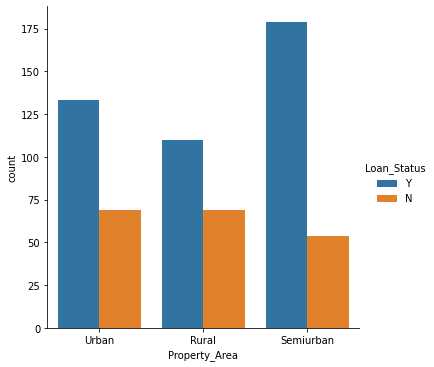

In [36]:
sn.catplot(x='Property_Area',hue='Loan_Status',kind='count',data=df)

semi urban property area has high rate of loan approval

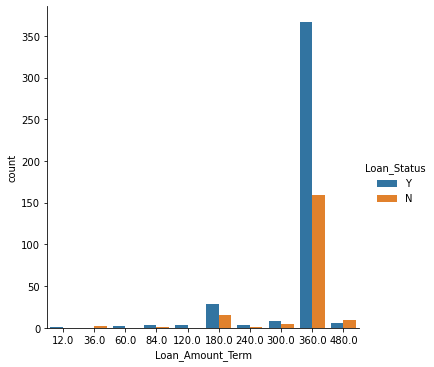

In [37]:
sn.catplot(x='Loan_Amount_Term',hue='Loan_Status',kind='count',data=df)

loan amount term with 360 have high chanve of loan approval

In [38]:
df.drop('Loan_ID',axis=1,inplace=True)

drooping the column as every row has its unique id, will not help in ml

In [39]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [40]:
a=df.describe(include=['O']).columns

saving the object datatype column in a variable

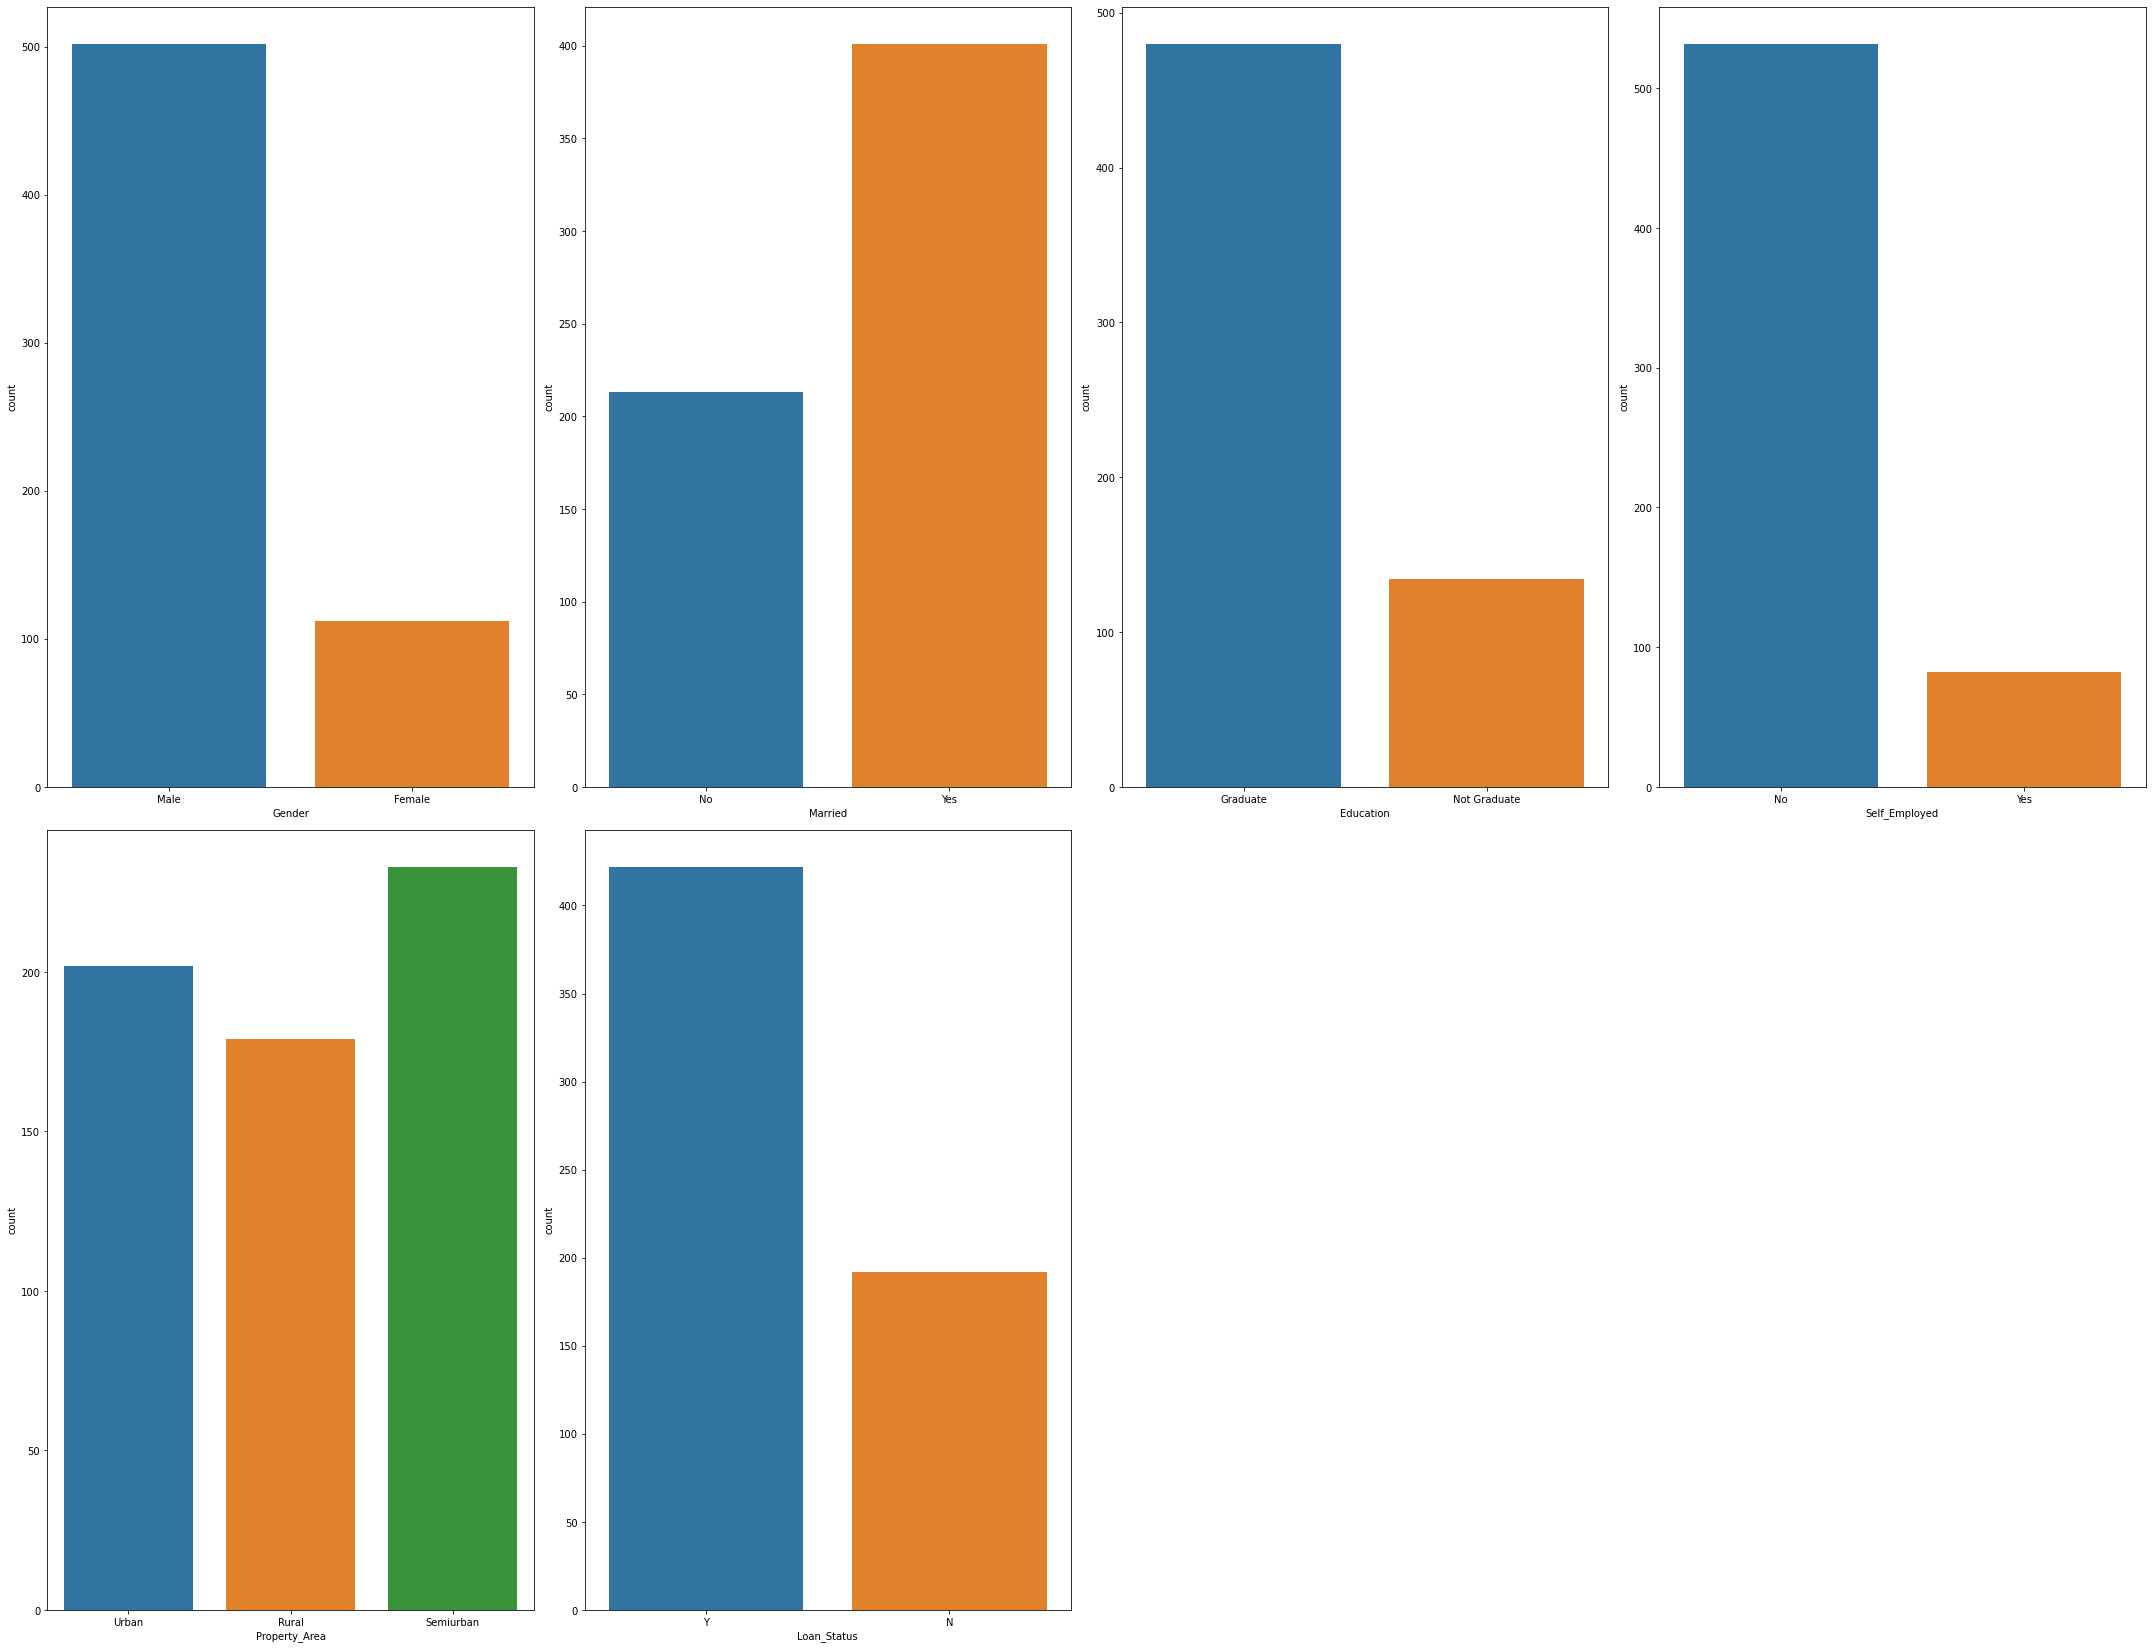

In [41]:
plt.figure(figsize=(30,34))
for i in range(len(a)):
    plt.subplot(3,4,i+1)
    sn.countplot(df[a[i]])
    plt.tight_layout()

male gender count is way more than woman

married category is more than not married

max people are graduate

max people are not self employed

max people stay in semi urban



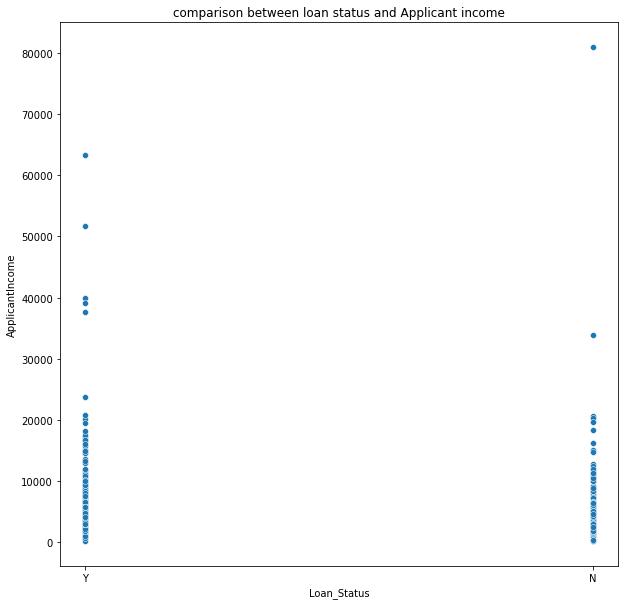

In [42]:
plt.figure(figsize=[10,10])
plt.title("comparison between loan status and Applicant income")
sn.scatterplot(df['Loan_Status'],df['ApplicantIncome']);

more the applicant income chances of approval is more

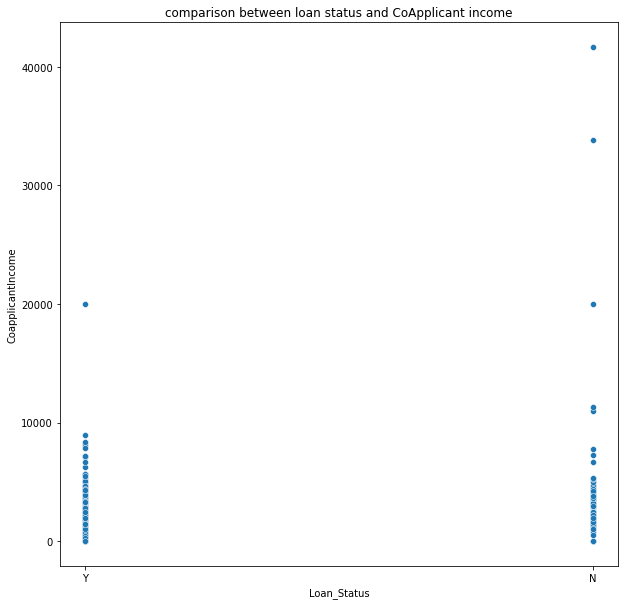

In [43]:
plt.figure(figsize=[10,10])
plt.title("comparison between loan status and CoApplicant income")
sn.scatterplot(df['Loan_Status'],df['CoapplicantIncome']);

coapplicant income of not approval is more

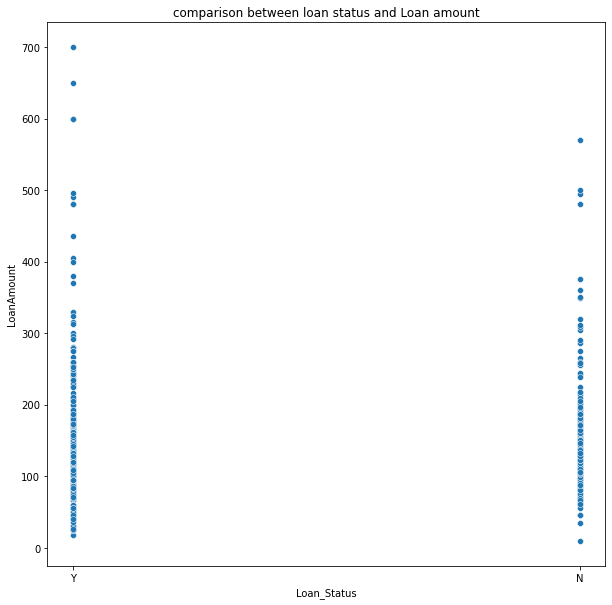

In [44]:
plt.figure(figsize=[10,10])
plt.title("comparison between loan status and Loan amount")
sn.scatterplot(df['Loan_Status'],df['LoanAmount']);

higher loan amount has approval but depends on other factors

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

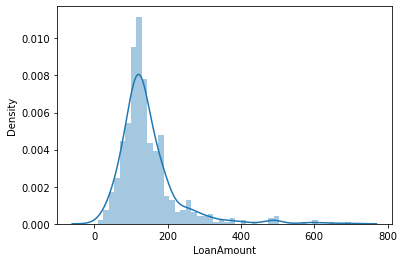

In [46]:
sn.distplot(df['LoanAmount'])

graph is skewed

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

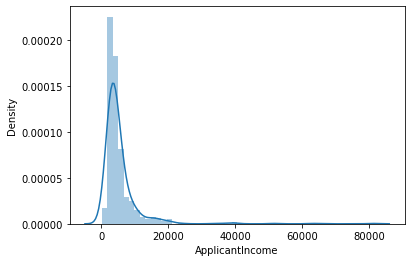

In [47]:
sn.distplot(df['ApplicantIncome'])

graph is skewed

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

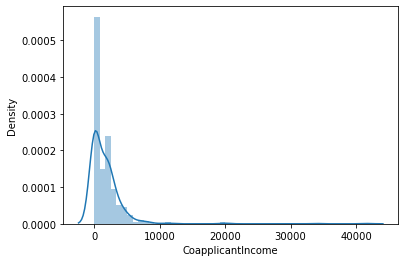

In [48]:
sn.distplot(df['CoapplicantIncome'])

graph is skewed

In [49]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in a:
    df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

encoding the object datatype column

In [50]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0


Gender                  AxesSubplot(0.125,0.657941;0.0824468x0.222059)
Married              AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
Dependents           AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
Education            AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
Self_Employed        AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
ApplicantIncome      AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
CoapplicantIncome    AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
LoanAmount           AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
Loan_Amount_Term        AxesSubplot(0.125,0.391471;0.0824468x0.222059)
Credit_History       AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
Property_Area        AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
Loan_Status          AxesSubplot(0.421809,0.391471;0.0824468x0.222059)
dtype: object

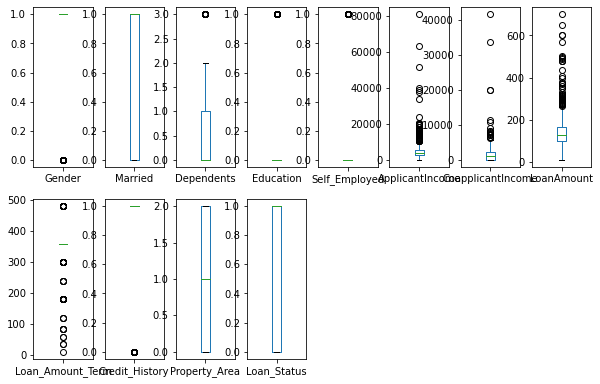

In [51]:
df.plot(kind='box',subplots=True,layout=(3,8),figsize=(10,10))

outliers are present in ApplicantIncome, CoapplicantIncome,loanamount,loan_amount term, credit history, dependent education self employed. we need to remove these

<AxesSubplot:>

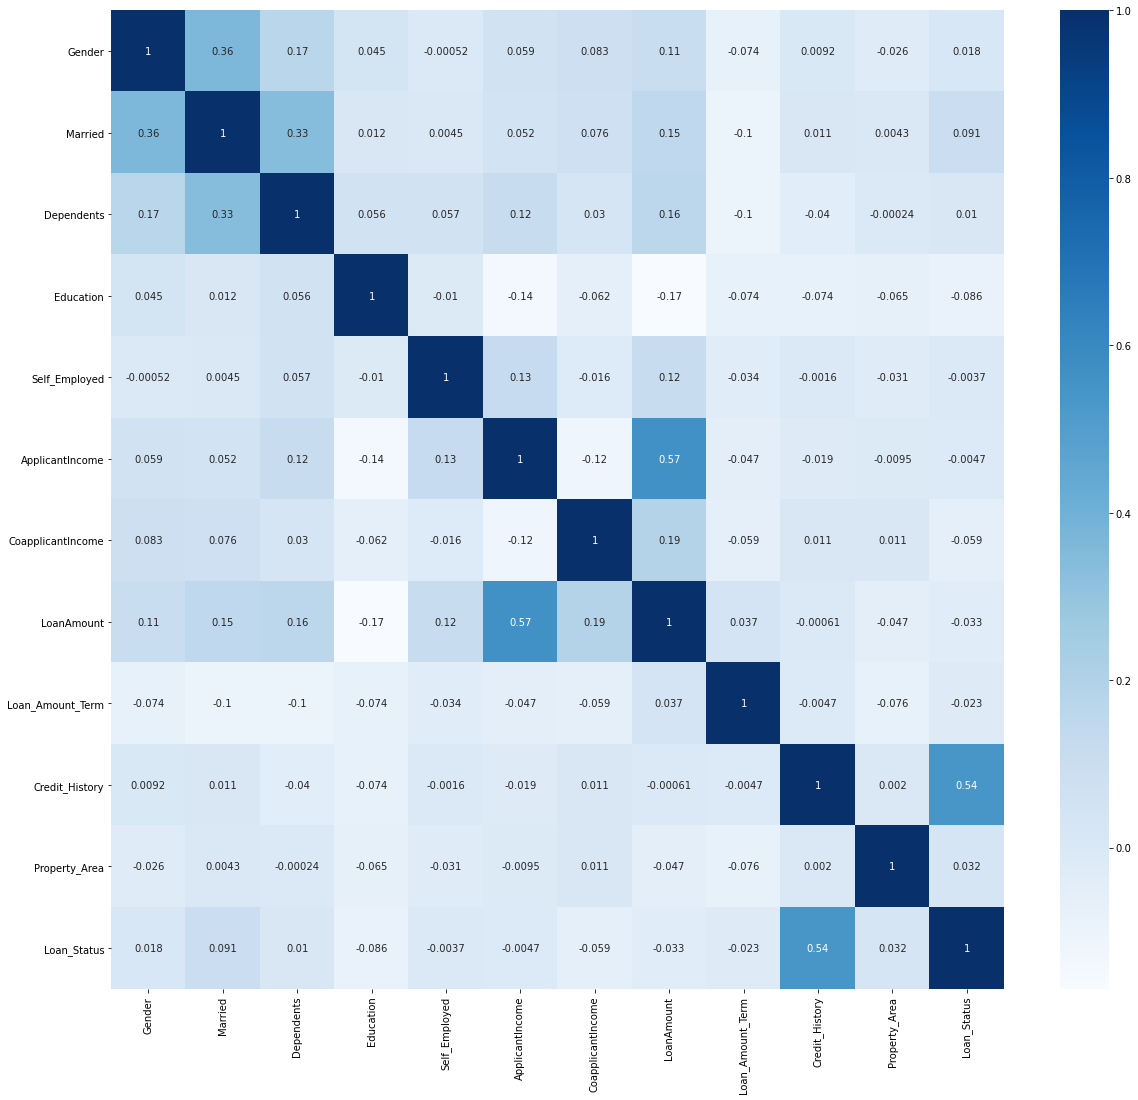

In [52]:
df_correlation=df.corr()
plt.figure(figsize=(20,18))
sn.heatmap(df_correlation,cmap='Blues',annot=True)

credit history is the max correlated 0.54 with loan status,least correlated is married column

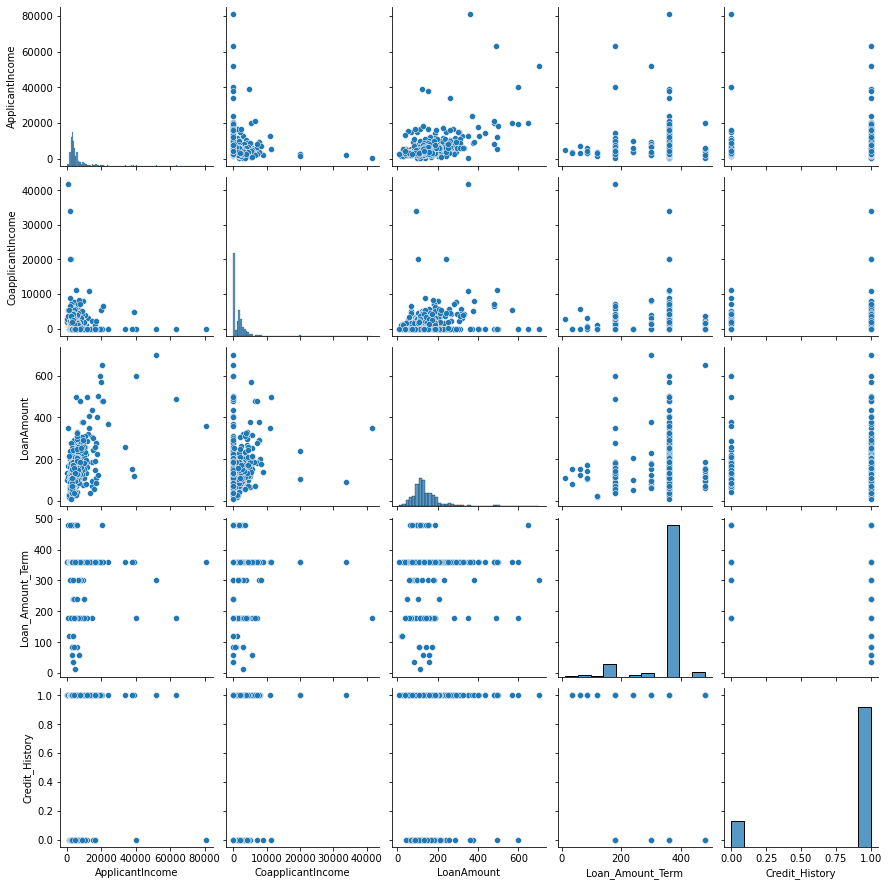

In [121]:
sn.pairplot(df)

people with more income takes loan of more amount.

loan amount term  with 360 is more.

In [53]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
    vif=pd.DataFrame()
    vif["variables"]=df.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)
calc_vif(df)

,variables,VIF FACTOR
0,Gender,6.002526
1,Married,3.697000
2,Dependents,1.792506
3,Education,1.311451
4,Self_Employed,1.176623
5,ApplicantIncome,2.888730
6,CoapplicantIncome,1.489371
7,LoanAmount,6.814872
8,Loan_Amount_Term,10.325040
9,Credit_History,9.071987


loan_amount_term has high multicollinearity but will not remove it as its not even that high

In [54]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [55]:
df_new=df[(z<3).all(axis=1)]
df_new.head()
df_new.shape

(577, 12)

In [56]:
df.shape

(614, 12)

In [57]:
Data_loss=((614-577)/677)*100
Data_loss

5.465288035450517

after removing the outlers the data loss is less than 6% hence we can remove these

In [58]:
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']
print(x.shape)
print(y.shape)

(577, 11)
(577,)


splitting x and y variable

In [59]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

skewness present in applicantincome, coapplicantincome and loan amount column

In [60]:
x['ApplicantIncome']=np.log1p(x['ApplicantIncome'])

In [61]:
x['CoapplicantIncome']=np.log1p(x['CoapplicantIncome'])

In [62]:
x['LoanAmount']=np.sqrt(x['LoanAmount'])

In [63]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount           0.359495
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

removed the skewness

# Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.688861,-1.127469,-0.034832,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.249082,0.780679,-0.034832,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.514859,-1.127469,-1.395808,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.784651,0.897159,-0.188121,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.734818,-1.127469,0.204380,0.230853,0.418513,1.227472


scaled the data

# Sampling

In [65]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)
trainx.value_counts()
trainy.value_counts()

0.0    398
1.0    398
Name: Loan_Status, dtype: int64

balanced the output variable

x=pd.DataFrame(trainx)
y=pd.DataFrame(trainy)

In [67]:
print(x.shape)
print(y.shape)

(796, 11)
(796, 1)


new shape of x and y variable after balancing

# Training and Testing of model

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=DecisionTreeClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.8250950570342205 on random state 78


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=78)

In [71]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of DecisionTreeClassifier() is:
0.8212927756653993
[[103  17]
 [ 30 113]]
              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       120
         1.0       0.87      0.79      0.83       143

    accuracy                           0.82       263
   macro avg       0.82      0.82      0.82       263
weighted avg       0.83      0.82      0.82       263





In [72]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of DecisionTreeClassifier() is:  0.7714544025157233


In [73]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=RandomForestClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.8897338403041825 on random state 78


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=78)

In [75]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of RandomForestClassifier() is:
0.870722433460076
[[102  18]
 [ 16 127]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86       120
         1.0       0.88      0.89      0.88       143

    accuracy                           0.87       263
   macro avg       0.87      0.87      0.87       263
weighted avg       0.87      0.87      0.87       263





In [76]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of RandomForestClassifier() is:  0.841816037735849


In [77]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=LogisticRegression()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.8060836501901141 on random state 177


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=177)

In [80]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of LogisticRegression() is:
0.8060836501901141
[[ 80  39]
 [ 12 132]]
              precision    recall  f1-score   support

         0.0       0.87      0.67      0.76       119
         1.0       0.77      0.92      0.84       144

    accuracy                           0.81       263
   macro avg       0.82      0.79      0.80       263
weighted avg       0.82      0.81      0.80       263





In [81]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of LogisticRegression() is:  0.7186006289308177


In [82]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=KNeighborsClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.8060836501901141 on random state 34


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=34)

In [84]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of KNeighborsClassifier() is:
0.8060836501901141
[[118  25]
 [ 26  94]]
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       143
         1.0       0.79      0.78      0.79       120

    accuracy                           0.81       263
   macro avg       0.80      0.80      0.80       263
weighted avg       0.81      0.81      0.81       263





In [85]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of KNeighborsClassifier() is:  0.7563286163522014


In [86]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=XGBClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

[14:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=68)

In [88]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

[14:17:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is:
0.8593155893536122
[[ 93  19]
 [ 18 133]]
              precision    recall  f1-score 

In [89]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

[14:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [90]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=SVC()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.8060836501901141 on random state 29


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=29)

In [92]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of SVC() is:  0.7436949685534591


In [93]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=AdaBoostClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.8326996197718631 on random state 133


In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=133)

In [95]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of AdaBoostClassifier() is:
0.8326996197718631
[[112  26]
 [ 18 107]]
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84       138
         1.0       0.80      0.86      0.83       125

    accuracy                           0.83       263
   macro avg       0.83      0.83      0.83       263
weighted avg       0.83      0.83      0.83       263





In [96]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of AdaBoostClassifier() is:  0.7337657232704403


In [97]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=GradientBoostingClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.8745247148288974 on random state 68


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=68)

In [99]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of GradientBoostingClassifier() is:  0.7915330188679246


after seeing the model performance and the cross val score of each model, the least difference between the two is RandomForestClassifier model. hence we will choose this model.

# Hyperparameter Tuning

In [102]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy import stats
from scipy.stats import randint

In [103]:
parameter={
         'max_features':['auto','sqrt','log2'],
          'min_samples_split':np.arange(0,10),
          'max_depth':np.arange(0,10),
          'min_samples_leaf':np.arange(0,10)}

In [104]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=10)

In [105]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [106]:
GCV.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [111]:
loan_mod=RandomForestClassifier(max_features='auto',max_depth=9,min_samples_leaf=1,min_samples_split=5)
loan_mod.fit(x_train,y_train)
pred=loan_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.83269961977186


after hyperparameter testing the accuracy score is 87.83% which is almost 88%.

# AUC-ROC

In [112]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [113]:
y_pred_prob=loan_mod.predict_proba(x_test)[:,1]

In [114]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

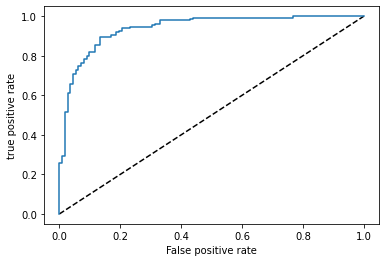

In [115]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.show()

curve is little far from the 1 as accuracy score is 88%

In [116]:
auc_score=roc_auc_score(y_test,loan_mod.predict(x_test))
print(auc_score)

0.8675201040681174


our auc_score is 86.75% which is almost similar to our accuracy score

# Saving Model

In [117]:
import joblib
joblib.dump(loan_mod,"loan_approval_prediction.pkl")

['loan_approval_prediction.pkl']

saved the model